In [7]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import nltk
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import re

In [9]:
 with open('text.txt', 'r') as file:
     document = file.read()

In [10]:
document

"Information retrieval (IR) is a critical field in computer science and library science that focuses on the process of obtaining information system resources that are relevant to an information need from a collection of those resources. The primary goal of IR is to enable users to find the information they seek efficiently and effectively. This process typically begins with a user's query, which can be expressed in natural language or through specific keywords. The system then searches through vast datasets, which may include documents, images, audio, or multimedia files, using algorithms and models that rank results based on relevance to the query. Techniques such as indexing, which organizes data for quick retrieval, and query processing, which interprets and optimizes user queries, are essential components of IR systems. Advanced approaches include the use of machine learning and natural language processing (NLP) to enhance search accuracy and user experience. Additionally, modern I

In [11]:
word_count = len(document.split())
sentence_count = len(re.split('[.!?]', document))

 # Identify special characters
special_characters = re.findall('[^A-Za-z0-9\s]', document)
special_characters = set(special_characters)
print(f"Words: {word_count}, Sentences: {sentence_count}")
print(f"Special Characters: {special_characters}")

Words: 294, Sentences: 12
Special Characters: {')', '-', "'", '(', '.', ','}


In [12]:
document = re.sub(r"[^A-Za-z\s]", "", document)

In [13]:
print(document)

Information retrieval IR is a critical field in computer science and library science that focuses on the process of obtaining information system resources that are relevant to an information need from a collection of those resources The primary goal of IR is to enable users to find the information they seek efficiently and effectively This process typically begins with a users query which can be expressed in natural language or through specific keywords The system then searches through vast datasets which may include documents images audio or multimedia files using algorithms and models that rank results based on relevance to the query Techniques such as indexing which organizes data for quick retrieval and query processing which interprets and optimizes user queries are essential components of IR systems Advanced approaches include the use of machine learning and natural language processing NLP to enhance search accuracy and user experience Additionally modern IR systems often incorpo

In [14]:
 tokens = word_tokenize(document)
 print(f"Tokens: {tokens}")

Tokens: ['Information', 'retrieval', 'IR', 'is', 'a', 'critical', 'field', 'in', 'computer', 'science', 'and', 'library', 'science', 'that', 'focuses', 'on', 'the', 'process', 'of', 'obtaining', 'information', 'system', 'resources', 'that', 'are', 'relevant', 'to', 'an', 'information', 'need', 'from', 'a', 'collection', 'of', 'those', 'resources', 'The', 'primary', 'goal', 'of', 'IR', 'is', 'to', 'enable', 'users', 'to', 'find', 'the', 'information', 'they', 'seek', 'efficiently', 'and', 'effectively', 'This', 'process', 'typically', 'begins', 'with', 'a', 'users', 'query', 'which', 'can', 'be', 'expressed', 'in', 'natural', 'language', 'or', 'through', 'specific', 'keywords', 'The', 'system', 'then', 'searches', 'through', 'vast', 'datasets', 'which', 'may', 'include', 'documents', 'images', 'audio', 'or', 'multimedia', 'files', 'using', 'algorithms', 'and', 'models', 'that', 'rank', 'results', 'based', 'on', 'relevance', 'to', 'the', 'query', 'Techniques', 'such', 'as', 'indexing', '

In [15]:
stop_words = stopwords.words("english")
filtered_tokens = [word for word in tokens if word not in stop_words]
print(f"Tokens after stop word removal: {filtered_tokens}")

Tokens after stop word removal: ['Information', 'retrieval', 'IR', 'critical', 'field', 'computer', 'science', 'library', 'science', 'focuses', 'process', 'obtaining', 'information', 'system', 'resources', 'relevant', 'information', 'need', 'collection', 'resources', 'The', 'primary', 'goal', 'IR', 'enable', 'users', 'find', 'information', 'seek', 'efficiently', 'effectively', 'This', 'process', 'typically', 'begins', 'users', 'query', 'expressed', 'natural', 'language', 'specific', 'keywords', 'The', 'system', 'searches', 'vast', 'datasets', 'may', 'include', 'documents', 'images', 'audio', 'multimedia', 'files', 'using', 'algorithms', 'models', 'rank', 'results', 'based', 'relevance', 'query', 'Techniques', 'indexing', 'organizes', 'data', 'quick', 'retrieval', 'query', 'processing', 'interprets', 'optimizes', 'user', 'queries', 'essential', 'components', 'IR', 'systems', 'Advanced', 'approaches', 'include', 'use', 'machine', 'learning', 'natural', 'language', 'processing', 'NLP', 'e

In [16]:
pos_tags = pos_tag(filtered_tokens)
print(f"POS Tags: {pos_tags}")

POS Tags: [('Information', 'NN'), ('retrieval', 'NN'), ('IR', 'NNP'), ('critical', 'JJ'), ('field', 'NN'), ('computer', 'NN'), ('science', 'NN'), ('library', 'JJ'), ('science', 'NN'), ('focuses', 'VBZ'), ('process', 'NN'), ('obtaining', 'VBG'), ('information', 'NN'), ('system', 'NN'), ('resources', 'NNS'), ('relevant', 'JJ'), ('information', 'NN'), ('need', 'NN'), ('collection', 'NN'), ('resources', 'NNS'), ('The', 'DT'), ('primary', 'JJ'), ('goal', 'NN'), ('IR', 'NNP'), ('enable', 'JJ'), ('users', 'NNS'), ('find', 'VBP'), ('information', 'NN'), ('seek', 'NN'), ('efficiently', 'RB'), ('effectively', 'RB'), ('This', 'DT'), ('process', 'NN'), ('typically', 'RB'), ('begins', 'VBZ'), ('users', 'NNS'), ('query', 'RB'), ('expressed', 'VBD'), ('natural', 'JJ'), ('language', 'NN'), ('specific', 'JJ'), ('keywords', 'VBZ'), ('The', 'DT'), ('system', 'NN'), ('searches', 'VBZ'), ('vast', 'JJ'), ('datasets', 'NNS'), ('may', 'MD'), ('include', 'VB'), ('documents', 'NNS'), ('images', 'VBZ'), ('audio'

In [17]:
porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(word) for word in filtered_tokens]
print(f"Stemmed Tokens: {stemmed_tokens}")

Stemmed Tokens: ['inform', 'retriev', 'ir', 'critic', 'field', 'comput', 'scienc', 'librari', 'scienc', 'focus', 'process', 'obtain', 'inform', 'system', 'resourc', 'relev', 'inform', 'need', 'collect', 'resourc', 'the', 'primari', 'goal', 'ir', 'enabl', 'user', 'find', 'inform', 'seek', 'effici', 'effect', 'thi', 'process', 'typic', 'begin', 'user', 'queri', 'express', 'natur', 'languag', 'specif', 'keyword', 'the', 'system', 'search', 'vast', 'dataset', 'may', 'includ', 'document', 'imag', 'audio', 'multimedia', 'file', 'use', 'algorithm', 'model', 'rank', 'result', 'base', 'relev', 'queri', 'techniqu', 'index', 'organ', 'data', 'quick', 'retriev', 'queri', 'process', 'interpret', 'optim', 'user', 'queri', 'essenti', 'compon', 'ir', 'system', 'advanc', 'approach', 'includ', 'use', 'machin', 'learn', 'natur', 'languag', 'process', 'nlp', 'enhanc', 'search', 'accuraci', 'user', 'experi', 'addit', 'modern', 'ir', 'system', 'often', 'incorpor', 'user', 'feedback', 'person', 'tailor', 'se

In [18]:
from collections import Counter
 # Calculate word frequencies
word_freq = Counter(stemmed_tokens)

most_common_words = word_freq.most_common(10)
unique_terms = set(stemmed_tokens)
print(f"Most common words: {most_common_words}")
print(f"Unique terms: {len(unique_terms)}")

Most common words: [('inform', 8), ('user', 8), ('process', 6), ('system', 6), ('retriev', 5), ('ir', 5), ('queri', 5), ('search', 4), ('model', 4), ('data', 4)]
Unique terms: 136


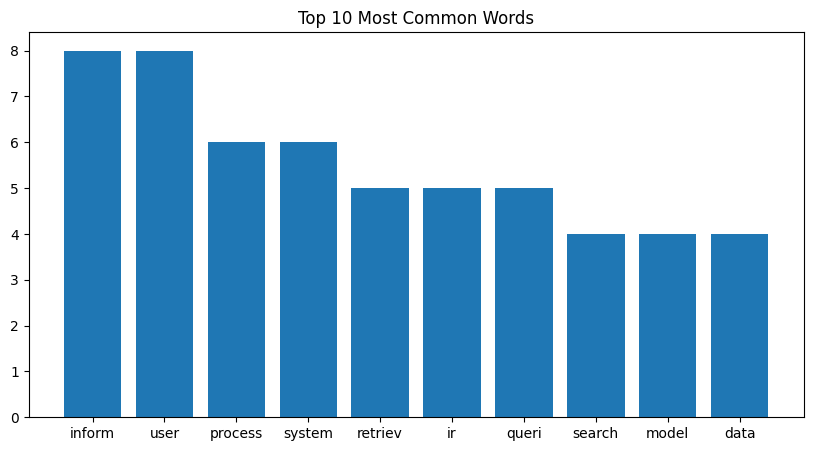

In [19]:
import matplotlib.pyplot as plt
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words')
plt.show()

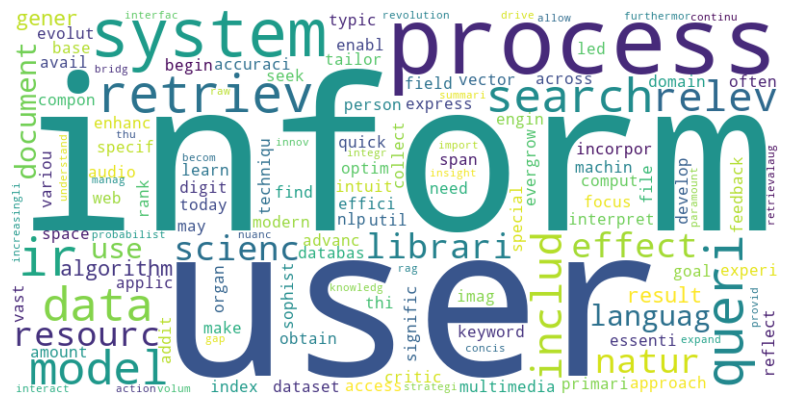

In [20]:
from wordcloud import WordCloud


# Assume `stemmed_tokens` is already defined and contains the processed tokens
stemmed_text = ' '.join(stemmed_tokens)  # Join stemmed tokens into a single string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(stemmed_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axes
plt.show()
